In [1]:
import csv 
import sys
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import json

In [2]:
# Tests to see if we are running in the Google Colaboratory environment
# If so, use an https URL to access the data.  Otherwise, load via the file path
try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/DataScienceNotebooks/master/Networking/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""

In [3]:
G = nx.DiGraph()

with open(data_file_prefix + "data/sw-relationships.csv", 'r' ) as theFile:
    reader = csv.DictReader(theFile)
    for line in reader:
        G.add_edge(line["src"],line["dst"])

In [4]:
def displayGraph(G):
    plt.figure(num=None, figsize=(10, 10), dpi=80)

    pos = nx.spring_layout(G,k=4)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=100)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist= G.edges, width=1, alpha=0.5, edge_color="b", style="dashed", arrows=True, arrowsize=10)
    
    #labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

    plt.axis("off")
    plt.show()

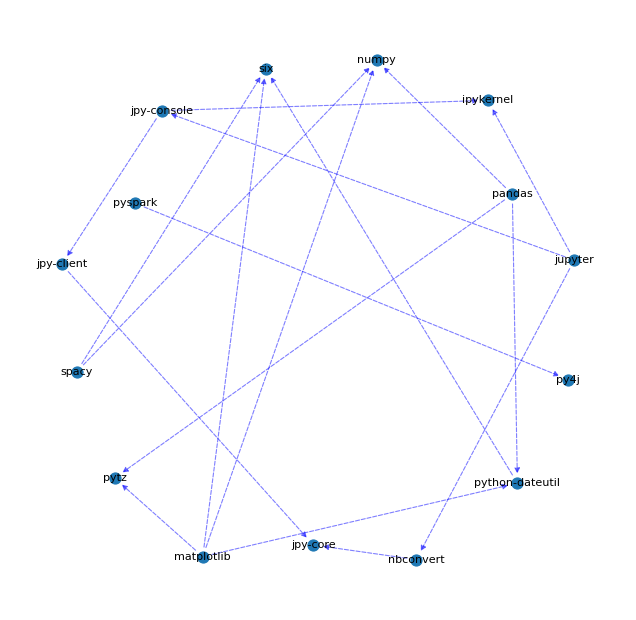

In [5]:
displayGraph(G)

In [6]:
merged_list = list(map(lambda x,y,z: (x[0],x[1],y[1],z[1]), G.degree(G.nodes), G.in_degree(G.nodes),G.out_degree(G.nodes)  ) )
df = pd.DataFrame(merged_list, columns=['Name','Degree', 'In Degree', 'Out Degree'])
print(df)

               Name  Degree  In Degree  Out Degree
0            pandas       3          0           3
1             numpy       3          3           0
2              pytz       2          2           0
3   python-dateutil       3          2           1
4               six       3          3           0
5           pyspark       1          0           1
6              py4j       1          1           0
7        matplotlib       4          0           4
8             spacy       2          0           2
9           jupyter       3          0           3
10        nbconvert       2          1           1
11        ipykernel       2          2           0
12      jpy-console       3          1           2
13       jpy-client       2          1           1
14         jpy-core       2          2           0


In [7]:
# in class, we assumed that the Graph was undirected.  Here the graph is directed and has a slightly different formula
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html
print (nx.clustering(G))

{'pandas': 0, 'numpy': 0, 'pytz': 0, 'python-dateutil': 0.16666666666666666, 'six': 0.16666666666666666, 'pyspark': 0, 'py4j': 0, 'matplotlib': 0.08333333333333333, 'spacy': 0, 'jupyter': 0.16666666666666666, 'nbconvert': 0, 'ipykernel': 0.5, 'jpy-console': 0.16666666666666666, 'jpy-client': 0, 'jpy-core': 0}


In [8]:
for c in sorted( nx.kosaraju_strongly_connected_components(G), key=len, reverse=True):
    print (c)

{'jpy-core'}
{'jpy-client'}
{'ipykernel'}
{'jpy-console'}
{'nbconvert'}
{'jupyter'}
{'py4j'}
{'pyspark'}
{'six'}
{'python-dateutil'}
{'pytz'}
{'numpy'}
{'spacy'}
{'matplotlib'}
{'pandas'}


In [9]:
Gc = nx.cycle_graph(4, create_using=nx.DiGraph())
nx.add_cycle(Gc, [10, 11, 12])

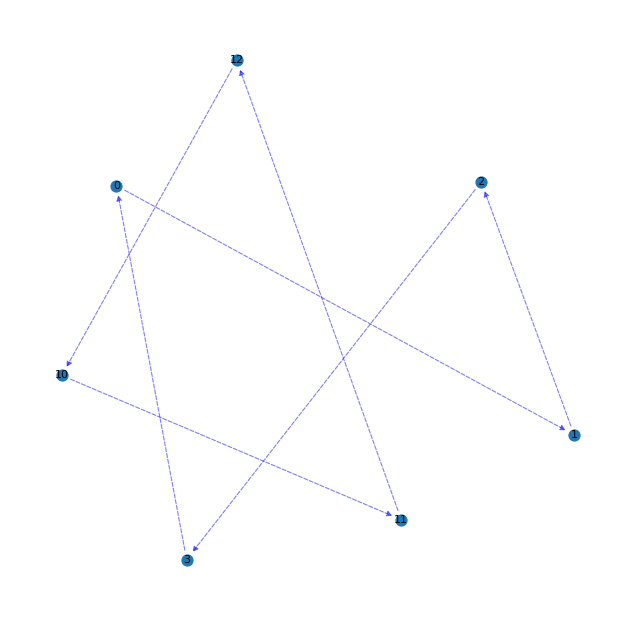

In [10]:
displayGraph(Gc)

In [11]:
for c in sorted( nx.kosaraju_strongly_connected_components(Gc), key=len, reverse=True):
    print (c)

{0, 1, 2, 3}
{10, 11, 12}


In [12]:
Gs = nx.DiGraph()

with open(data_file_prefix + "data/sw-relationships-connected.csv", 'r' ) as theFile:
    reader = csv.DictReader(theFile)
    for line in reader:
        Gs.add_edge(line["src"],line["dst"])

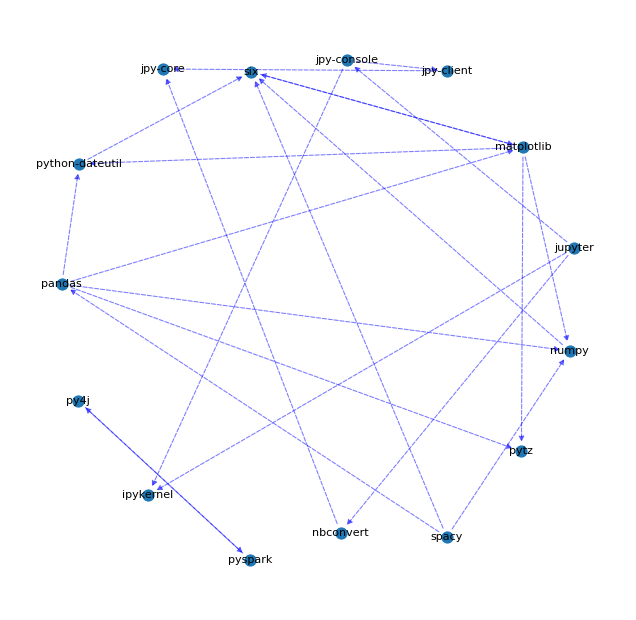

In [13]:
displayGraph(Gs)

In [14]:
for c in sorted( nx.kosaraju_strongly_connected_components(Gs), key=len, reverse=True):
    print (c)

{'matplotlib', 'numpy', 'python-dateutil', 'six'}
{'py4j', 'pyspark'}
{'jpy-core'}
{'jpy-client'}
{'ipykernel'}
{'jpy-console'}
{'nbconvert'}
{'jupyter'}
{'pytz'}
{'pandas'}
{'spacy'}


In [15]:
for c in sorted( nx.weakly_connected_components(G), key=len, reverse=True):
    print (c)

{'pytz', 'numpy', 'matplotlib', 'python-dateutil', 'pandas', 'six', 'spacy'}
{'jpy-console', 'jpy-core', 'ipykernel', 'jpy-client', 'nbconvert', 'jupyter'}
{'py4j', 'pyspark'}


In [16]:
for c in sorted( nx.algorithms.community.label_propagation.label_propagation_communities(G.to_undirected()), key=len, reverse=True):
    print (c)

{'pytz', 'numpy', 'matplotlib', 'python-dateutil', 'pandas', 'six', 'spacy'}
{'jupyter', 'jpy-console', 'ipykernel'}
{'nbconvert', 'jpy-core', 'jpy-client'}
{'py4j', 'pyspark'}


In [17]:
k = 4
comp = nx.algorithms.community.centrality.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities))      

(['matplotlib', 'numpy', 'pandas', 'python-dateutil', 'pytz', 'six', 'spacy'], ['py4j', 'pyspark'], ['ipykernel', 'jpy-console', 'jupyter'], ['jpy-client', 'jpy-core', 'nbconvert'])
